## Best Predictor in Predicting Tips: A STAT 301 Case Study Project

In [1]:
# Load packages
library(tidyverse)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### Introduction

In North America, tips are a customary amount of money given to the staff at dining establishments as a form of compliment or token of appreciation for their service. Typically, they are calculated as a percentage of the meal's price or customised based on consumers' discretion. Tipping behaviour is a subject of great interest across business industries and the social sciences as people understandably want to figure out how to earn more money and understand this interesting social phenomenon. Existing studies such as those by Michael Lynn, explore how tipping in the United States is influenced by people's beliefs across various situations (2015). Other studies study how tipping outcomes vary by gender and how this reflects differences in altruism (Parrett, 2023). 

Given the restaurant tips dataset from kaggle (Badole, 2025), it would be fruitful to explore the relationships between several variables and the tipping amount in order to try and understand what really drives tipping behaviour. The studies mentioned above explore the tipping phenomenon from a socio-psychological perspective which we would like to find out given that our dataset has variables such as whether the tipper is a smoker and the gender of the tipper. However, we would also like to explore more of the practical aspects - the time or day when customers have a meal and how large their party size is - and their relation to the amount of tips given. The relationship between tips and gender has been explored in prior literature, but there is not much research that has been done exploring the variety of variables available in this tips dataset. This project thus seeks to find out which set of these input variables best explain the variation in the amount of tips. The primary goal of this investigation is inference. Results could potentially be useful for restaurants to adjust their marketing strategies and optimise their returns from service. Finding out which factors interact significantly with tip amounts would also be advantageous for developing future predictive algorithms that aim to predict amount of tips based on consumer transaction data.

##### Data Description
This dataset is obtained from https://www.kaggle.com/datasets/saurabhbadole/restaurant-tips-dataset.

Collected from a popular restaurant over a specified period, this dataset looks into the tipping behavior in a restaurant setting. In this dataset, there are in total 244 observations, and 7 variables.
    
Table of variables used:
| Variable Name | Discription | Type |
| :---: | :---: | :---: |
|total_bill| total bill amount in dollars|Numerical, independent variable|
|sex| Gender of the person paying the bill (Male/Female)|Categorical, independent variable|
|smoker|Whether the person is a smoker (Yes/No) |Categorical, independent variable|
|day|Day of the week when the transaction took place (Thur/Fri/Sat/Sun)|Categorical, independent variable|
|time|Time of day when the transaction took place (Lunch/Dinner)|Categorical, independent variable|
|size|Size of the dining party (number of people)|Numerical, independent variable|
|tip|Tip amount in dollars|Numerical, target variable|

##### Research Question

*Which set of input variables available in the tips dataset best explain the variation in the amount of tips?*

### Methods and Results

#### Exploratory Data Analysis (EDA)

In [9]:
url <- "https://raw.githubusercontent.com/JustinTrenchcoat/STAT_301_Personal_Project/refs/heads/main/tips.csv"
data_tips <- read.csv(url(url), header = TRUE)
head(data_tips)
tail(data_tips)

,total_bill,tip,sex,smoker,day,time,size
,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
6,25.29,4.71,Male,No,Sun,Dinner,4


,total_bill,tip,sex,smoker,day,time,size
,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>
239,35.83,4.67,Female,No,Sat,Dinner,3
240,29.03,5.92,Male,No,Sat,Dinner,3
241,27.18,2.00,Female,Yes,Sat,Dinner,2
242,22.67,2.00,Male,Yes,Sat,Dinner,2
243,17.82,1.75,Male,No,Sat,Dinner,2
244,18.78,3.00,Female,No,Thur,Dinner,2


The dataset is already in tidy format.

In [12]:
# convert character variables into factors
data_tips$sex <- as.factor(data_tips$sex)
data_tips$smoker <- as.factor(data_tips$smoker)
data_tips$day <- as.factor(data_tips$day)
data_tips$time <- as.factor(data_tips$time)

In [ ]:
cat("Dataset contains", nrow(data_tips), "observations and", ncol(data_tips), "variables.\n\n")
summary_table <- tibble(
  variable = names(data_tips),
  type = sapply(data_tips, function(x) class(x)[1]),
  n_levels = sapply(data_tips, function(x) if(is.factor(x)) nlevels(x) else NA),
  have_NA = sapply(data_tips, function(x) any(is.na(x)))
)
summary_table

Dataset contains 244 observations and 7 variables.



variable,type,n_levels,have_NA
<chr>,<chr>,<int>,<lgl>
total_bill,numeric,NA,FALSE
tip,numeric,NA,FALSE
sex,factor,2,FALSE
smoker,factor,2,FALSE
day,factor,4,FALSE
time,factor,2,FALSE
size,integer,NA,FALSE


Above is a summary table for our dataset. Except for `tip`, we have 4 categorical variables and 2 numerical variables. There are no missing values.

### Visualization 1

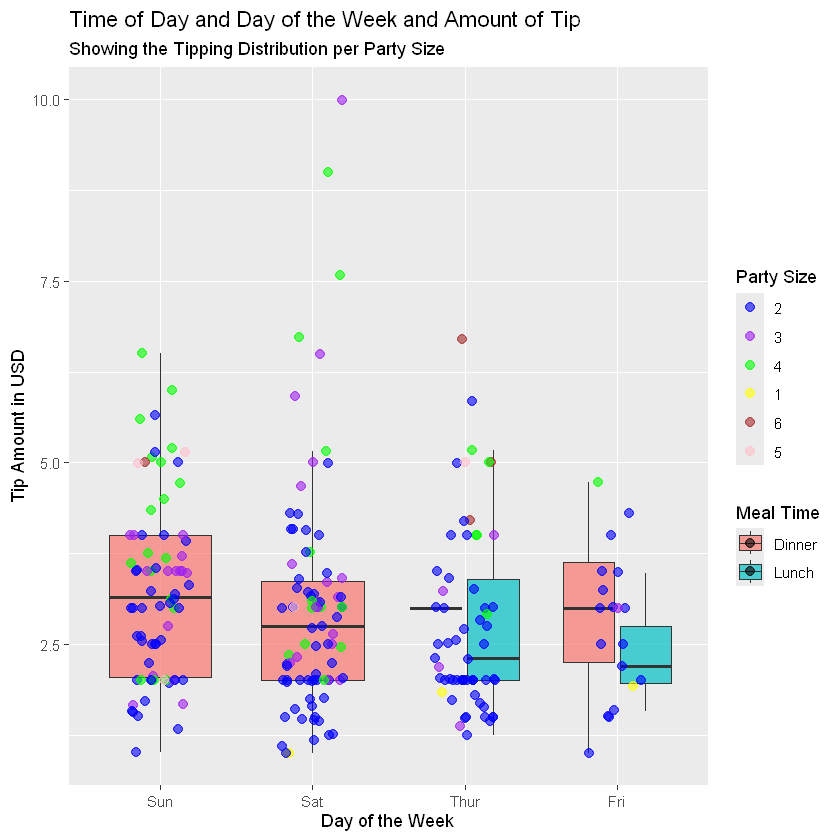

In [18]:
# transform size into factor type for visualization
data_size_as_fac <- data_tips %>% mutate(
    day = factor(day, levels = unique(day)),
    time = as.factor(time),
    size = factor(size, levels= unique(size))
)

visualization <- ggplot(data_size_as_fac, aes(x = day, y = tip, fill = time)) +
  geom_boxplot(alpha = 0.7, outlier.shape = NA) + 
  geom_jitter(aes(color = size), width = 0.2, alpha = 0.6, size = 2.5) +  # Transparent and smaller points
  scale_color_manual(values = c("1"="yellow", "2"="blue", "3"="purple", "4"= "green", "5"="pink", "6"= "brown")) +  
labs(
    title = "Time of Day and Day of the Week and Amount of Tip",
      subtitle = "Showing the Tipping Distribution per Party Size",
    x = "Day of the Week",
    y = "Tip Amount in USD",
    fill = "Meal Time",
    color = "Party Size"
  )
visualization

This plot shows how tip amounts vary across days and meal times, with point color indicating party size. The range of tips differs by day of the week, with Saturday showing several higher values. Additionally, tips tend to be larger during dinner compared to lunch.

### Visualization 2

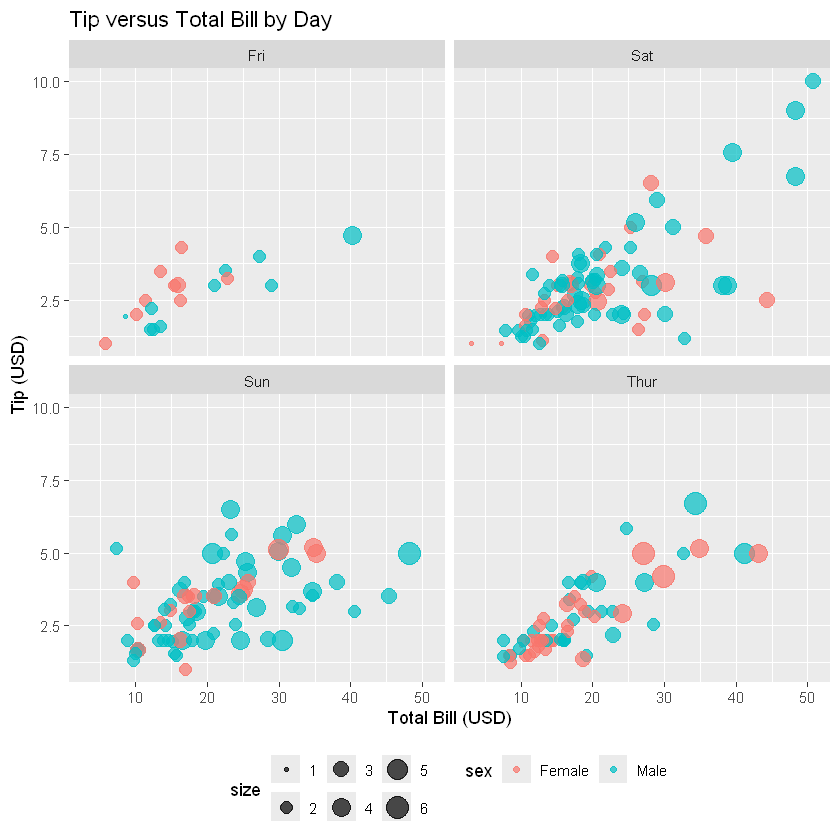

In [22]:
ggplot(data_tips, aes(x = total_bill, y = tip, color = sex, size = size)) +
  geom_point(alpha = 0.7) +
  facet_wrap(~ day, nrow = 2) +
  labs(
    title = "Tip versus Total Bill by Day",
    x = "Total Bill (USD)", 
    y = "Tip (USD)"
  ) +
  theme(legend.position = "bottom")

This graph shows the relationship between tip and total bill, with point size indicating party size and color representing gender. There appears to be a strong linear association between total bill and tip. While a few high tips are visible on Saturday, they are reasonable within the context of the data and not extreme relative to other points. Therefore, no transformations or removals will be applied to our data.

### Discussion

### References

* Badole, S. (2025). *Restaurant Tips Dataset*. Retrieved from [https://www.kaggle.com/datasets/saurabhbadole/restaurant-tips-dataset](https://www.kaggle.com/datasets/saurabhbadole/restaurant-tips-dataset)

* Lynn, M. (2015). Service gratuities and tipping: A motivational framework. *Journal of Economic Psychology*, 46, 74-88. https://doi.org/10.1016/j.joep.2014.12.002

* Parrett, M. (2023). Gender differences in altruism and the price of altruism: Evidence from restaurant tips. *Applied Economics Letters*, 30(8), 1097-1100. https://doi.org/10.1080/13504851.2022.2036678